# Analisi Dati: Efficientamento Energetico

Abbiamo trovato [qui](https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/whiteside.html) dei dati riguardo al consumo di gas una casa, la cui descrizione è la seguente:

_"Il signor Derek Whiteside del UK Building Research Station ha registrato il consumo settimanale di gas e la temperatura esterna media della propria abitazione nel sud-est dell’Inghilterra per due stagioni di riscaldamento: una di 26 settimane prima e una di 30 settimane dopo l’installazione dell’isolamento delle pareti. L’obiettivo dello studio era valutare l’effetto dell’isolamento sul consumo di gas."_

In [ ]:
# Importiamo le librerie necessarie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Prima di tutto, dobbiamo scaricare i dati e vedere di cosa si tratta

In [ ]:
# Scarichiamo i dati e li mettiamo in un DataFrame
LINK_DATI = 'https://raw.githubusercontent.com/DavideScassola/data_analysis_laboratory/main/notebooks/dati/whiteside.csv'
df = pd.read_csv(LINK_DATI)

Bene, ora che abbiamo caricato il dataset, possiamo vedere quali colonne ha la nostra tabella.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Insul   56 non-null     object 
 1   Temp    56 non-null     float64
 2   Gas     56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


La tabella ha 3 colonne e 56 righe:
- `Insul` (i.e. _insulation_) indica se alla casa è stato fatto l'intervento di efficientamento energetico. I valori possibili sono solo "Before" e "After".
- `Temp` (i.e. _temperature_) è la temperatura esterna media di una data settimana
- `Gas` indica il consumo totale per una data settimana

In [ ]:
valori_distinti_insul = df["Insul"].unique().tolist()
print(f"Possibili valori della colonna 'Insul': {valori_distinti_insul}\n\n")

frequenza_valori_insul = df["Insul"].value_counts()
print(f"Frequenza dei valori della colonna 'Insul':\n {frequenza_valori_insul}")

Possibili valori della colonna 'Insul': ['Before', 'After']


Frequenza dei valori della colonna 'Insul':
 Insul
After     30
Before    26
Name: count, dtype: int64


Vogliamo vedere se dopo l'intervento il consumo di gas si è abbassato.
Possiamo iniziare calcolando la media del consumo di gas settimanale prima e dopo l'intervento:

In [ ]:
# Per comodità, creiamo due dataframe separati per i dati prima e dopo l'isolamento
df_before = df[df['Insul']=='Before'].reset_index(drop=True)
print(f"Numero dati prima di intervento isolamento: {len(df_before)}")
df_after = df[df['Insul']=='After'].reset_index(drop=True)
print(f"Numero dati dopo intervento isolamento: {len(df_after)}")

Numero dati prima di intervento isolamento: 26
Numero dati dopo intervento isolamento: 30


In [ ]:
df_before.head(n=10)

,Insul,Temp,Gas
0,Before,-0.8,7.2
1,Before,-0.7,6.9
2,Before,0.4,6.4
3,Before,2.5,6.0
4,Before,2.9,5.8
5,Before,3.2,5.8
6,Before,3.6,5.6
7,Before,3.9,4.7
8,Before,4.2,5.8
9,Before,4.3,5.2


In [ ]:
df_after.head(n=10)

,Insul,Temp,Gas
0,After,-0.7,4.8
1,After,0.8,4.6
2,After,1.0,4.7
3,After,1.4,4.0
4,After,1.5,4.2
5,After,1.6,4.2
6,After,2.3,4.1
7,After,2.5,4.0
8,After,2.5,3.5
9,After,3.1,3.2


In [ ]:
# Ora calcoliamo la media del consumo di gas prima e dopo l'isolamento
consumo_medio_prima = df_before['Gas'].mean()
consumo_medio_dopo = df_after['Gas'].mean()

print(f'Consumo gas medio prima: {consumo_medio_prima:.2f}')
print(f'Consumo gas medio dopo: {consumo_medio_dopo:.2f}')

Consumo gas medio prima: 4.75
Consumo gas medio dopo: 3.48


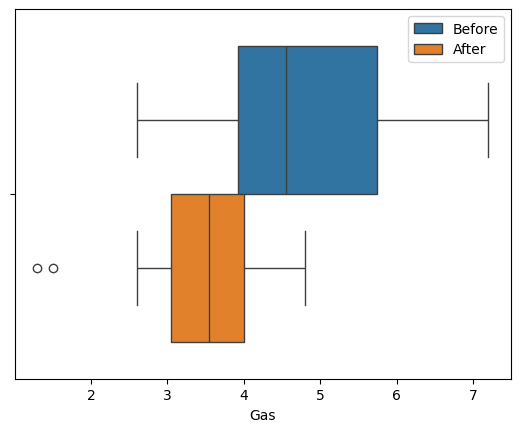

In [ ]:
# Per essere ancora più scrupolosi, possiamo confrontare le distribuzioni del consumo di gas tramite boxplot
sns.boxplot(data=df, x='Gas', hue='Insul')
plt.legend()
plt.show()

Bene! A quanto pare il consumo medio è inferiore dopo l'intervento. Ma questa informazione è sufficiente? Se la temperatura media fosse stata superiore allora avremmo comunque avuto bisgno di meno gas per riscaldare la casa. Quello che vogliamo verificare è che, a parità di temperatura esterna, il consumo di gas sia inferiore.
In ogni caso possiamo controllare anche la media delle temperature:

In [ ]:
temperatura_media_prima = df_before['Temp'].mean()
temperatura_media_dopo = df_after['Temp'].mean()

print(f'Temperatura media prima: {temperatura_media_prima:.2f} C°')
print(f'Temperatura media dopo: {temperatura_media_dopo:.2f} C°')

Temperatura media prima: 5.35 C°
Temperatura media dopo: 4.46 C°


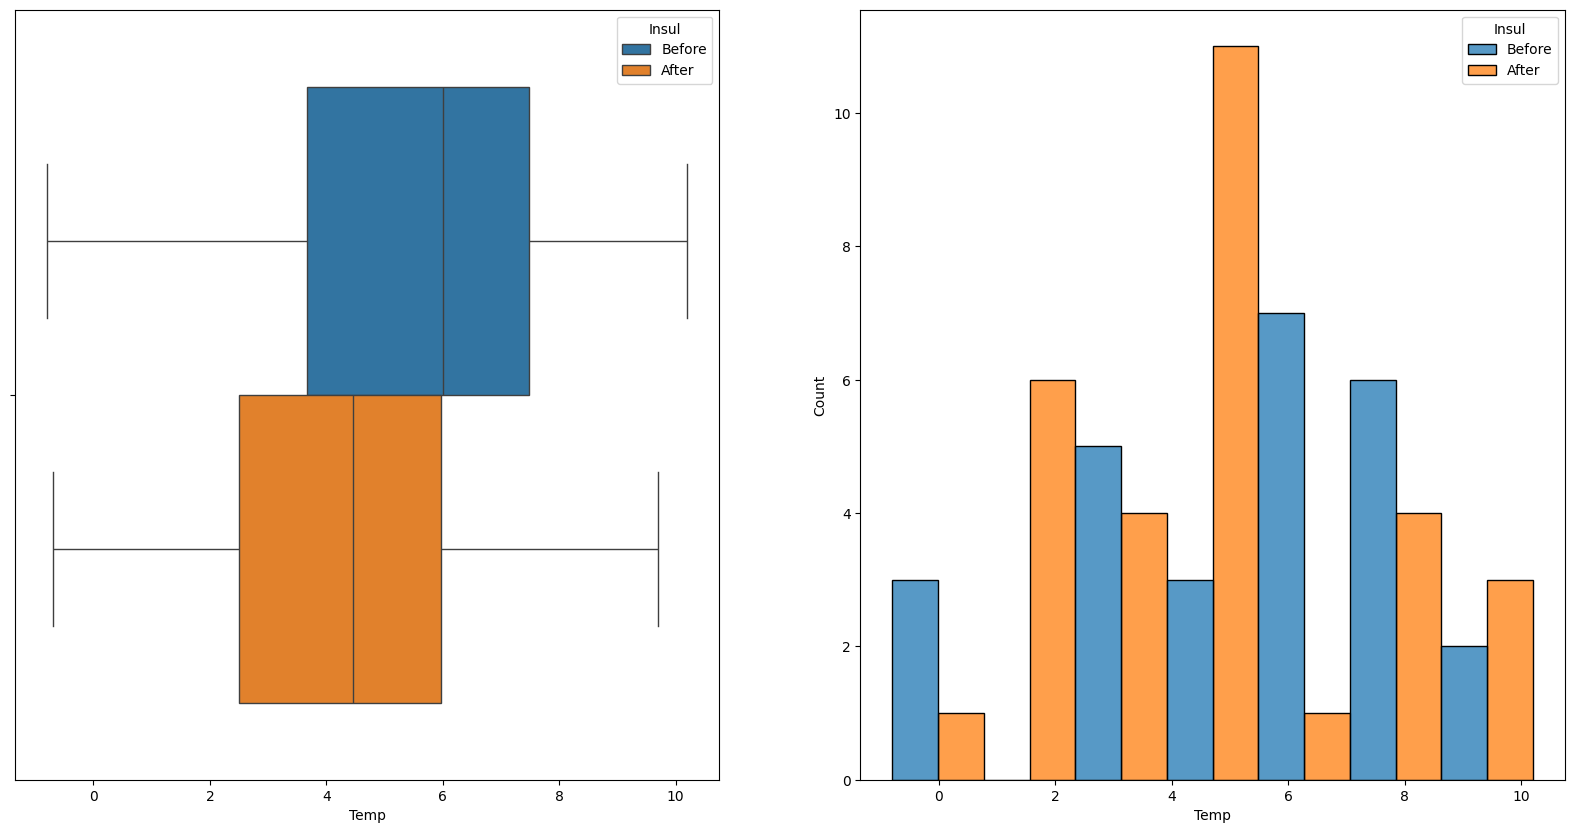

In [ ]:
# anche qua, per essere scrupolosi, possiamo confrontare le distribuzioni tra le temperature
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(data=df, x='Temp', hue='Insul', ax=axs[0])
sns.histplot(data=df, x='Temp', hue='Insul', ax=axs[1], multiple='dodge')
plt.show()

Se vogliamo scoprire qualcosa sulla relazione tra temperatura esterna, consumo di gas e isolamente termico possiamo fare un grafico in cui mostriamo tutte e 3 queste caratteristiche. Iniziamo usando l'asse delle x per rappresentare la temperatura e l'asse delle y per il consumo di gas:

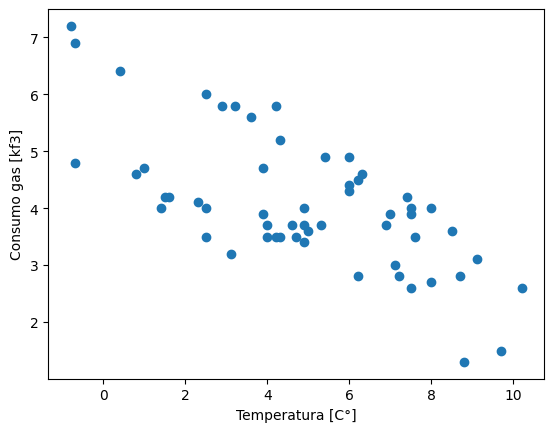

In [ ]:
plt.plot(df['Temp'], df['Gas'], 'o')
plt.xlabel('Temperatura [C°]')
_ = plt.ylabel('Consumo gas [kf3]')

E' evidente che il consumo di gas è più alto quando fa più freddo.

**Domanda**: che tipo di correlazione è questa? Diretta o inversa? Che segno ci aspettiamo che abbia il coefficiente angolare di un modello lineare fittato su questi dati?

Ma ora proviamo a considerare anche l'isolamento termico. Possiamo mostrare le osservazioni prima e dopo l'intervento con un colore diverso:

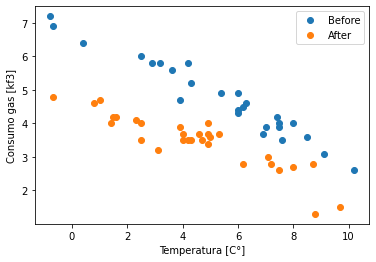

In [ ]:
# prima mostriamo i dati prima dell'isolamento
plt.plot(df_before['Temp'], df_before['Gas'], 'o', label='Before')

# ora aggiungiamo i dati dopo dell'isolamento
plt.plot(df_after['Temp'], df_after['Gas'], 'o', label='After')

plt.legend()
plt.xlabel('Temperatura [C°]')
_ = plt.ylabel('Consumo gas [kf3]')

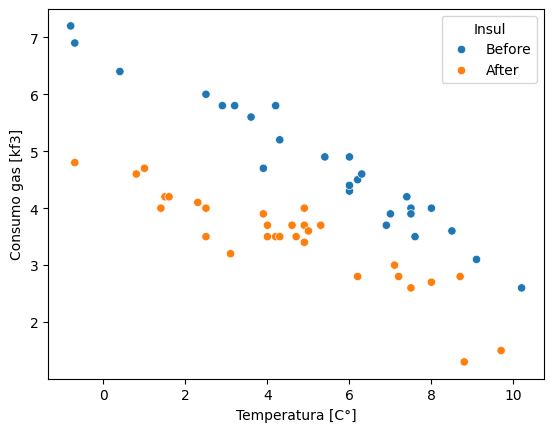

In [ ]:
# visualizzazione equivalente, sfruttando il fatto che df è un pd.Dataframe
sns.scatterplot(data=df, x='Temp', y='Gas', hue='Insul')
plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [kf3]')
plt.show()

Da questo grafico si vede come, a parità di temperatura, il consumo di gas è inferiore dopo l'isolamento.

Ora però dobbiamo quantificare quanto si risparmia in termini di gas, data una qualsiasi temperatura!

Per fare ciò abbiamo bisogno di costruire un **modello**, cioè una funzione (o regola) che prende in input la temperatura esterna e se la casa ha subito l'intervento o no (`Insul`), e restituisce una _predizione_ del consumo di gas:

$$gas(temperatura, isolamento)$$

In particolare vogliamo construire un **modello statistico**, perchè il modello imparerà dai dati che gli diamo.

Iniziamo con un modello molto semplice che predice il consumo di gas sapendo la temperatura esterna (per adesso ignoriamo l'isolamento). Il modello più semplice è il modello lineare, cioè:

$$gas(temperatura) = \beta + \alpha \cdot temperatura$$

Usando il nome delle variabili del nostro dataset:

`Gas` $ = \beta + \alpha $ `Temp`

Per costruire questo modello, dobbiamo trovare dei valori di $\beta$ ed $\alpha$ tali per cui, se prendiamo una qualsiasi riga del nostro dataset, cioè una coppia di valori
$(t, g)$, dove $t$ è la temperatura (ovvero un valore della colonna `Temp`) e $g$ è il consumo di gas (ovvero un valore della colonna `Gas`, per esempio $t=0.8$ e $g=7.2$) allora si verifica che $g \approx gas(t) = \beta + \alpha \cdot t$, per esempio $7.2 \approx gas(-0.8) = \beta + \alpha \cdot (-0.8)$.

Come troviamo questi valori, detti **parametri**, per $\beta$ e $\alpha$?

In [ ]:
# Importiamo la classe LinearRegression dalla libreria
from sklearn.linear_model import LinearRegression

# Creiamo un modello di regressione lineare e addestriamolo
model_all_points = LinearRegression()
model_all_points.fit(X=df[['Temp']], # X è l'input del modello, in questo caso la temperatura
          y=df['Gas']) # y è l'output del modello, in questo caso il consumo di gas

# Mostriamo i parametri stimati del modello
print(f'Coefficiente angolare: {model_all_points.coef_[0]:.2f}')
print(f'Intercetta: {model_all_points.intercept_:.2f}')

# Come misura di qualità del modello, calcoliamo il coefficiente R^2
r_squared_all_points = model_all_points.score(df[['Temp']], df['Gas'])
print(f'Coefficiente di Determinazione R^2: {r_squared_all_points:.2f}')

Coefficiente angolare: -0.29
Intercetta: 5.49
Coefficiente di Determinazione R^2: 0.47


Cosa posso osservare da questo coefficiente di determinazione? Sono soddisfatto della quantità di variabilità nei dati spiegata dal modello?

Quindi il modello appreso è

$$ gas(temperatura) = 5.49 -0.29 \cdot temperatura $$

Possiamo vedere la predizione del nostro modello insieme ai dati:

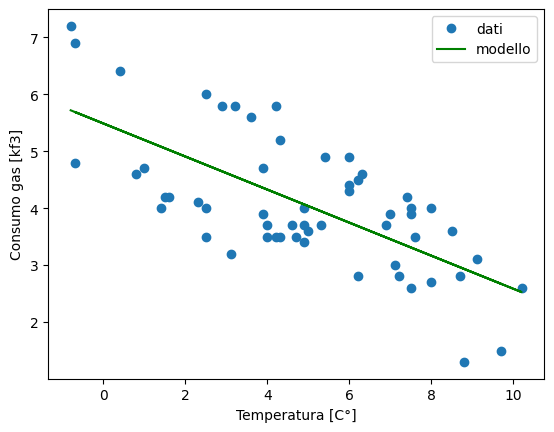

In [ ]:
# Come prima, mostriamo tutti dati
plt.plot(df['Temp'], df['Gas'], 'o', label='dati')

# Mostriamo la predizione del modello per ogni punto (unite da una linea continua!)
plt.plot(df['Temp'], model_all_points.predict(df[['Temp']]), '-', color='green', label='modello')

plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [kf3]')
plt.legend()
plt.show()

Questo ci mostra semplicemente una relazione tra la temperatura esterna e il consumo di gas. Ma noi siamo interessati al contributo dell'isolamento termico al consumo di gas, quindi dobbiamo aggiungere la variabile "isolamento" al nostro modello: $ gas(temperatura, isolamento) $.

Come possiamo estendere il nostro modello lineare? L'isolamento non è neanche un numero, le colonne sono delle stringhe "Before" e "After". Cosa si può fare quando una variabile non è un numero, ma una **categoria**?

La cosa più semplice da fare è creare due modelli lineari semplici distinti: uno per i punti in cui `Insul=Before` e un altro per quelli tali che `Insul=After`.

(before) Coefficiente angolare: -0.39
(before) Intercetta: 6.85
(after) R^2: 0.94
(after) Coefficiente angolare: -0.28
(after) Intercetta: 4.72
(after) R^2: 0.81


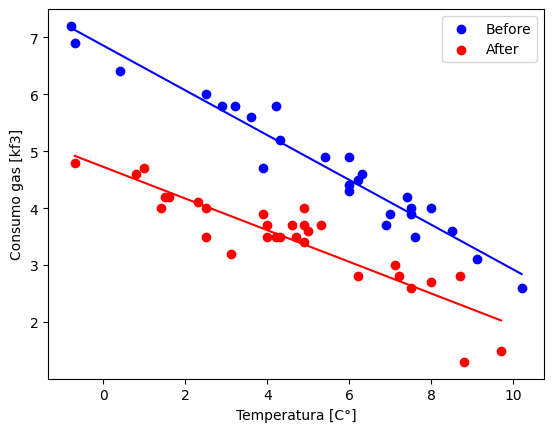

In [ ]:
# Creiamo due modelli distinti

# Prima dell'isolamento
model_before = LinearRegression()
model_before.fit(X=df_before[['Temp']], y=df_before['Gas'])

print(f'(before) Coefficiente angolare: {model_before.coef_[0]:.2f}')
print(f'(before) Intercetta: {model_before.intercept_:.2f}')
print(f'(before) R^2: {model_before.score(X=df_before[['Temp']], y=df_before['Gas']):.2f}')


# Dopo l'isolamento
model_after = LinearRegression()
model_after.fit(X=df_after[['Temp']], y=df_after['Gas'])

print(f'(after) Coefficiente angolare: {model_after.coef_[0]:.2f}')
print(f'(after) Intercetta: {model_after.intercept_:.2f}')
print(f'(after) R^2: {model_after.score(X=df_after[['Temp']], y=df_after['Gas']):.2f}')

# Ora mostriamo le predizioni dei due modelli
plt.scatter(df_before['Temp'], df_before['Gas'], color='blue', label = 'Before')
plt.plot(df_before['Temp'], model_before.predict(df_before[['Temp']]), color='blue')

plt.scatter(df_after['Temp'], df_after['Gas'], color='red', label = 'After')
plt.plot(df_after['Temp'], model_after.predict(df_after[['Temp']]), color='red')

plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [kf3]')
plt.legend()
plt.show()

Considerando questo modello:

$$
gas(temperatura, isolamento) =
\begin{cases}
6.85 -0.39 \cdot temperatura & \text{if } isolamento= 0 \ (Before) \\
4.72 -0.28 \cdot temperatura & \text{if } isolamento= 1 \ (After)
\end{cases}
$$

Allora abbiamo che:

$$risparmio(temperatura) = gas(temperatura, \text{Before}) - gas(temperatura, \text{After}) = 2.13 - 0.11 \cdot temperatura$$

Notiamo che la differenza misura il risparmio in termini assoluti, potrebbe invece essere più adeguato considerare il risparmio in termini relativi (cioè in percentuale):

$$\frac{gas(temperatura, \text{After})}{gas(temperatura, \text{Before})}$$

ad esempio, quando la temperatura è di 0 gradi, abbiamo

$$\frac{gas(0, \text{After})}{gas(0, \text{Before})} = \frac{4.72 -0.28 \cdot 0}{6.85 -0.39 \cdot 0} = \frac{4.72}{6.85} \approx 69\%$$

Cioè a 0 gradi si stima un risparmio di circa il $31\%$ .

## Un altro modo per trattare le variabili non-numeriche (categoriche)

Sostituiamo "Before" con 0 e "After" con 1. Adesso si pu`ø costruire un unico modelo lineare che tenga conto di tutte le variabili e tutti i punti del dataset, dato che ora "isolamento" è un numero:

$$gas(temperatura, isolamento) = \beta_0 + \beta_1 \cdot temperatura + \beta_2 \cdot isolamento$$

Le variabili che vengono estratte da delle categorie in questo modo vengono chiamate **dummy variables**.



In [ ]:
# aggiungiamo la colonna "Insul_dummy" per l'isolamento
df['Insul_dummy'] = (df['Insul']=='After').astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Insul        56 non-null     object 
 1   Temp         56 non-null     float64
 2   Gas          56 non-null     float64
 3   Insul_dummy  56 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
df.sample(n=10, random_state=42)

,Insul,Temp,Gas,Insul_dummy
0,Before,-0.8,7.2,0
5,Before,3.2,5.8,0
33,After,2.5,4.0,1
13,Before,6.0,4.4,0
19,Before,7.5,4.0,0
50,After,7.2,2.8,1
36,After,3.9,3.9,1
26,After,-0.7,4.8,1
44,After,4.9,3.7,1
12,Before,6.0,4.3,0


In [ ]:
# Modello lineare
model = LinearRegression()
model.fit(X=df[["Temp", "Insul_dummy"]], y=df["Gas"])

r_squared = model.score(df[["Temp", "Insul_dummy"]], df["Gas"])

print(f'Coefficiente temperatura: {model.coef_[0]:.2f}')
print(f'Coefficiente isolamento: {model.coef_[1]:.2f}')
print(f'Intercetta: {model.intercept_:.2f}')
print(f'R^2: {r_squared:.2f}')

Coefficiente temperatura: -0.34
Coefficiente isolamento: -1.57
Intercetta: 6.55
R^2: 0.91


Quindi il modello imparato è:
$$ gas(temperatura, isolamento) = 6.55 -0.34 \cdot temperatura - 1.57 \cdot isolamento$$

Un modo equivalente per scrivere questa formula è:

$$
gas(temperatura, isolamento) =
\begin{cases}
6.55 -0.34 \cdot temperatura & \text{if } isolamento= 0 \ (Before) \\
(6.55-1.57) -0.34 \cdot temperatura& \text{if } isolamento= 1 \ (After)
\end{cases}
$$

Questo equivale ad evere un modello lineare la cui intercetta cambia in base alla variabile "isolamento".

Possiamo visualizzare questo modello con due linee distinte:

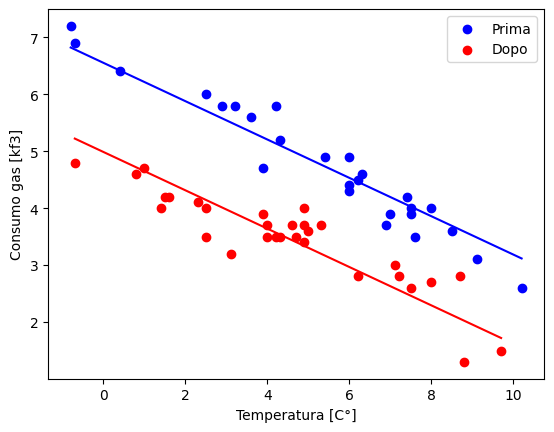

In [ ]:
# Mostriamo i dati prima dell'isolamento, insieme alla predizione per questi punti
df_before = df[df['Insul_dummy']==0]
plt.scatter(df_before['Temp'], df_before['Gas'], color='blue', label = 'Prima')
plt.plot(df_before['Temp'], model.predict(df_before[['Temp', 'Insul_dummy']]), color='blue')

# Mostriamo i dati dopo dell'isolamento, insieme alla predizione per questi punti
df_after = df[df['Insul_dummy']==1]
plt.scatter(df_after['Temp'], df_after["Gas"], color='red', label = 'Dopo')
plt.plot(df_after['Temp'], model.predict(df_after[['Temp', 'Insul_dummy']]), color='red')

plt.xlabel('Temperatura [C°]')
plt.ylabel('Consumo gas [kf3]')
plt.legend()
plt.show()

Considerando questo modello:

$$
gas(temperatura, isolamento) =
\begin{cases}
6.85 -0.39 \cdot temperatura & \text{if } isolamento= 0 \ (Before) \\
4.72 -0.28 \cdot temperatura & \text{if } isolamento= 1 \ (After)
\end{cases}
$$

Allora abbiamo che:

$$risparmio(temperatura) = gas(temperatura, \text{Before}) - gas(temperatura, \text{After}) = 2.13 - 0.11 \cdot temperatura$$

Questo modello definisce due intercette diverse in base all'isolamento, ma la pendenza della retta rimane la stessa (le due rette mostrate sono parallele). Infatti, il risparmio stimato è un valore fisso e non dipende dalla temperatura.

Ora che abbiamo il modello $gas(temperatura, isolamento)$ possiamo stimare il risparmio facendo la differenza tra il consumo stimato senza isolamento e con l'isolamento:

$$gas(temperatura, \text{Before}) - gas(temperatura, \text{After})$$

$$ = 6.55 -0.34 \cdot temperatura - ((6.55-1.57) -0.34 \cdot temperatura) = 1.57$$